# Statistics Notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle
from tqdm.notebook import tqdm_notebook
import sys
sys.path.append('../')
import utils

/Users/cutterdawes/Desktop/Princeton/Thesis/Repo/stats/../utils.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
%load_ext autoreload
%autoreload 2

## Figure 1: Carry Tables for Base 4

In [4]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

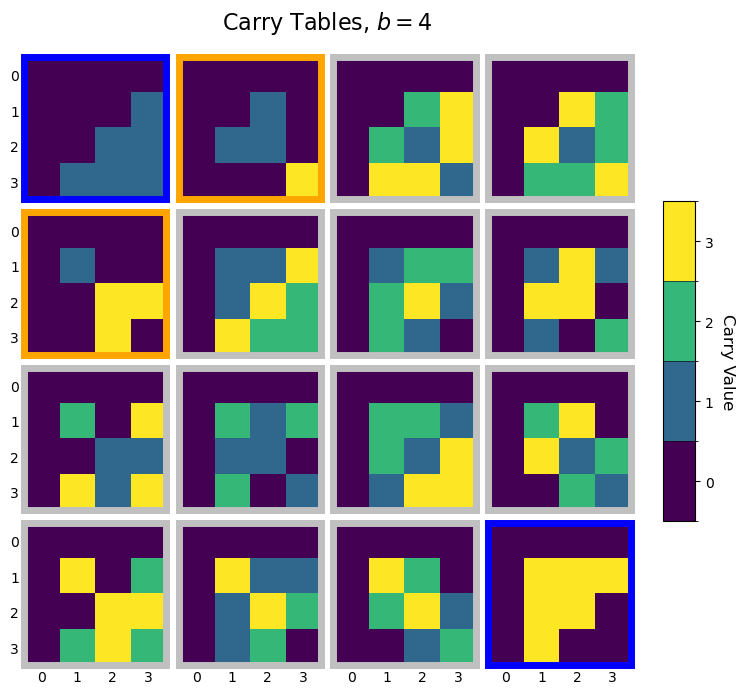

In [5]:
utils.show_tables(all_tables[4], 4, depth=1, savefig=False)

## Figure 2: Recursive Structure of Carry Tables

In [25]:
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as patches

In [28]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

In [29]:
b = 3
tables = all_tables[b]

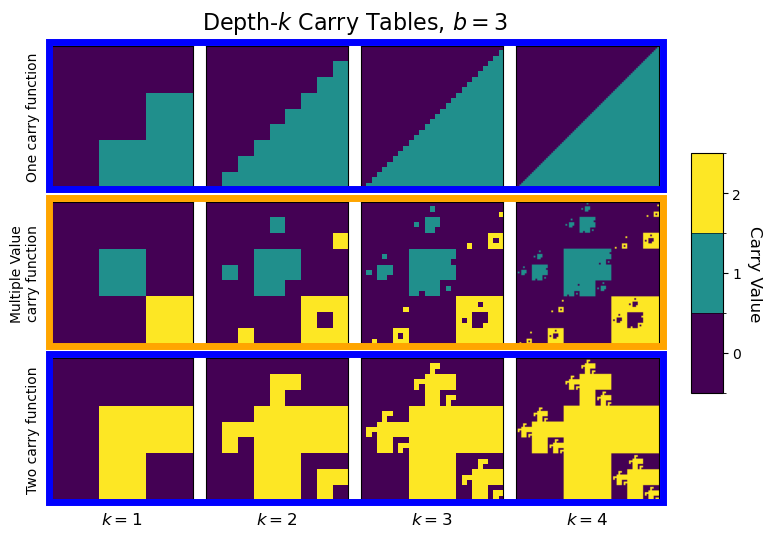

In [32]:
# create fig, axes
fig, axes = plt.subplots(3, 4, figsize=(2*4, 2*3))
fig.suptitle('Depth-$k$ Carry Tables, '+ r'$b =$' + str(b), fontsize=16, y=0.94)

# sort table_dict
tables = {dc: tables[dc] for dc in sorted(tables.keys())}

# iterate through table_dict
i = 0
for dc, table in tables.items():

    # classify as standard, alt. unit, or other carry
    if (np.array(dc) == 0).all():
        carry_type = 'Standard'
        color = 'blue'
    elif len(np.unique(table)) == 2:
        carry_type = 'Alt. Unit'
        color = 'orange'
    else:
        carry_type = 'Other'
        color = 'silver'

    # construct product table
    for j in range(0, 4):
        depth = j + 1
        product_table = utils.construct_product_table(table, depth)

        # display image, increment i
        ax = axes[i, j]
        # if j == 0:
        #     utils.add_border(ax, color=color, width=4)
        levels = np.linspace(-0.5, b-0.5, b+1)
        norm = BoundaryNorm(levels, ncolors=256)
        im = ax.imshow(product_table, cmap='viridis', norm=norm)
        # ax.set_title(carry_type, fontsize=10)
    
    i += 1

# turn off axis ticks and labels
for ax in axes.flatten():
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# add labels
for j, ax in enumerate(axes[b-1,:]):
    ax.set_xlabel(f'$k={j+1}$', fontsize=12)
axes[0,0].set_ylabel('One carry function')
axes[1,0].set_ylabel('Multiple Value\ncarry function')
axes[2,0].set_ylabel('Two carry function')

# add colorbar
plt.tight_layout()
fig.subplots_adjust(left=0.12, right=0.88, bottom=0.12, top=0.88)
cbar_ax = fig.add_axes([0.92, 0.3, 0.04, 0.4])
cbar = fig.colorbar(im, cax=cbar_ax, boundaries=levels, drawedges=True)
cbar.set_ticks(range(b))
cbar.set_label('Carry Value', fontsize=12, rotation=270, labelpad=15)

# draw rectangles
pad = 0.002
for row_idx in range(3):
    # get all axes in this row
    row_axes = axes[row_idx, :]

    # get their positions in figure coordinates
    positions = [ax.get_position() for ax in row_axes]

    # compute bounding box covering the whole row
    x0 = min(p.x0 for p in positions)
    y0 = min(p.y0 for p in positions)
    x1 = max(p.x1 for p in positions)
    y1 = max(p.y1 for p in positions)
    width = x1 - x0
    height = y1 - y0

    # add padding
    x0 -= pad
    y0 -= pad
    width += 4 * pad
    height += 4 * pad

    # determine color based on carry type (same logic as before)
    dc = list(tables.keys())[row_idx]
    table = tables[dc]
    est_dim = est_dim_box_vs_depth[b][dc][3]
    if len(np.unique(all_tables[b][dc])) == 2:
        color = 'blue'
    elif est_dim > 1.25 and est_dim < 1.5:
        color = 'orange'
    else:
        color = 'silver'

    # draw rectangle around the row
    rect = patches.Rectangle(
        (x0, y0),
        width,
        height,
        edgecolor=color,
        facecolor='none',
        linewidth=5,
        transform=fig.transFigure,
        zorder=10
    )
    fig.patches.append(rect)

# plt.savefig(f'../figures/tables{b}_recursion.png', dpi=300, bbox_inches='tight')

## Figure 3: Quantitative Measures of Structure

In [15]:
with open('../pickles/carry_tables/all_tables_d1_b2-6.pickle', 'rb') as f:
    all_tables = pickle.load(f)

In [16]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

In [17]:
with open('../pickles/complexity_measures/frac_zeros_vs_depth.pickle', 'rb') as f:
    frac_zeros_vs_depth = pickle.load(f)

In [18]:
with open('../pickles/complexity_measures/associativity_vs_depth_d6.pickle', 'rb') as f:
# with open('../pickles/complexity_measures/associativity_vs_depth_d5_s1000.pickle', 'rb') as f:
    associativity_vs_depth = pickle.load(f)

In [19]:
from matplotlib.lines import Line2D

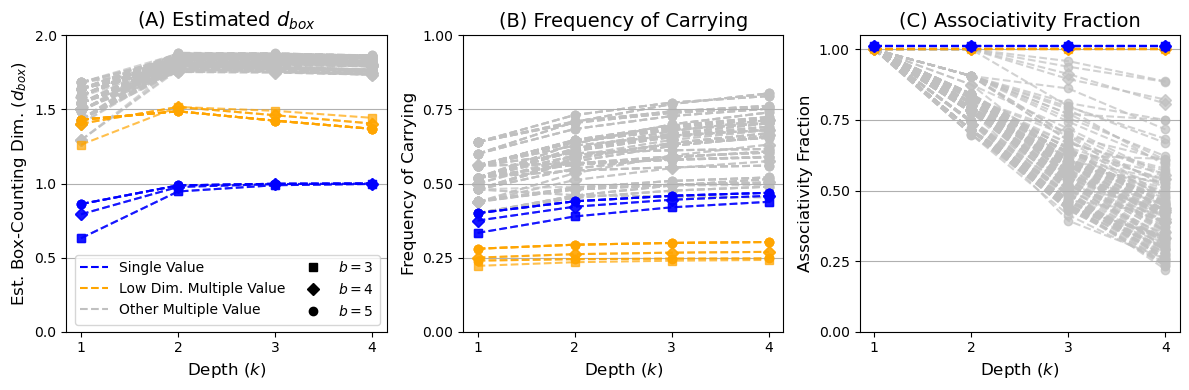

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
markers = {3: 's', 4: 'D', 5: 'o'}

# est dims subfig
for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dims = est_dim_box_vs_depth[b][dc]
        est_dim = dims[3]
        if len(np.unique(tables[dc])) == 2:
            unit, = axes[0].plot(dims, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Single Value', zorder=3)
        elif est_dim > 1.25 and est_dim < 1.5:
            special_non_unit, = axes[0].plot(dims, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Low Dim. Multiple Value', zorder=2)
        else:
            non_unit, = axes[0].plot(dims, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Other Multiple Value', zorder=1)
    axes[0].set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
    axes[0].set_xlabel('Depth ($k$)', fontsize=12)
    axes[0].set_yticks(np.linspace(0, 2, 5))
    label = axes[0].set_ylabel('Est. Box-Counting Dim. ($d_{box}$)', fontsize=12)
    axes[0].grid(axis='y')
axes[0].set_title(r'(A) Estimated $d_{box}$', fontsize=14)

# plot legend
marker_legend_elements = [
    Line2D([0], [0], marker='s', color='black', linestyle='None', label=r'$b=3$'),
    Line2D([0], [0], marker='D', color='black', linestyle='None', label=r'$b=4$'),
    Line2D([0], [0], marker='o', color='black', linestyle='None', label=r'$b=5$')
]
curve_legend_elements = [
    Line2D([0], [0], color='blue', linestyle='--', marker=None, label='Single Value'),
    Line2D([0], [0], color='orange', linestyle='--', marker=None, label='Low Dim. Multiple Value'),
    Line2D([0], [0], color='silver', linestyle='--', marker=None, label='Other Multiple Value')
]
all_legend_elements = curve_legend_elements + marker_legend_elements
axes[0].legend(handles=all_legend_elements, loc='lower right', ncol=2, columnspacing=1)

# carry freq subfig
for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dim = est_dim_box_vs_depth[b][dc][3]
        carry_freq = 1 - np.cumsum(np.array(frac_zeros_vs_depth[b][dc])) / np.arange(1, 5)
        if len(np.unique(tables[dc])) == 2:
            unit, = axes[1].plot(carry_freq, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Single Value', zorder=3)
        elif dim > 1.25 and dim < 1.5:
            special_non_unit, = axes[1].plot(carry_freq, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Low Dim. Multiple Value', zorder=2)
        else:
            non_unit, = axes[1].plot(carry_freq, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Other Multiple Value', zorder=1)
axes[1].set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
axes[1].set_xlabel('Depth ($k$)', fontsize=12)
axes[1].set_yticks(np.linspace(0, 1, 5))
axes[1].set_ylabel('Frequency of Carrying', fontsize=12)
axes[1].grid(axis='y')
axes[1].set_title('(B) Frequency of Carrying', fontsize=14)
plt.tight_layout()

# associativity fraction subfig
for b in range(3, 6):
    tables = all_tables[b]
    for dc in tables.keys():
        dim = est_dim_box_vs_depth[b][dc][3]
        assoc_vs_depth = associativity_vs_depth[b][dc][:4]
        if len(np.unique(tables[dc])) == 2:
            unit, = axes[2].plot(np.array(assoc_vs_depth)+0.01, color='blue', alpha=0.7, marker=markers[b], linestyle='--', label='Single Value', zorder=3)
        elif dim > 1.25 and dim < 1.5:
            special_non_unit, = axes[2].plot(assoc_vs_depth, color='orange', alpha=0.7, marker=markers[b], linestyle='--', label='Low Dim. Multiple Value', zorder=2)
        else:
            non_unit, = axes[2].plot(assoc_vs_depth, color='silver', alpha=0.7, marker=markers[b], linestyle='--', label='Other Multiple Value', zorder=1)
axes[2].set_xticks([0, 1, 2, 3], [1, 2, 3, 4])
axes[2].set_xlabel('Depth ($k$)', fontsize=12)
axes[2].set_yticks(np.linspace(0, 1, 5))
axes[2].set_ylabel('Associativity Fraction', fontsize=12)
axes[2].grid(axis='y')
axes[2].set_title('(C) Associativity Fraction', fontsize=14)

plt.tight_layout()
# plt.savefig('../figures/complexity_measures.png', dpi=300)

## Figure B.11: Carry Tables for Base 5

In [18]:
b = 5

In [19]:
from matplotlib.colors import BoundaryNorm
import matplotlib.patches as patches

In [20]:
with open('../pickles/complexity_measures/est_dim_box_vs_depth.pickle', 'rb') as f:
    est_dim_box_vs_depth = pickle.load(f)

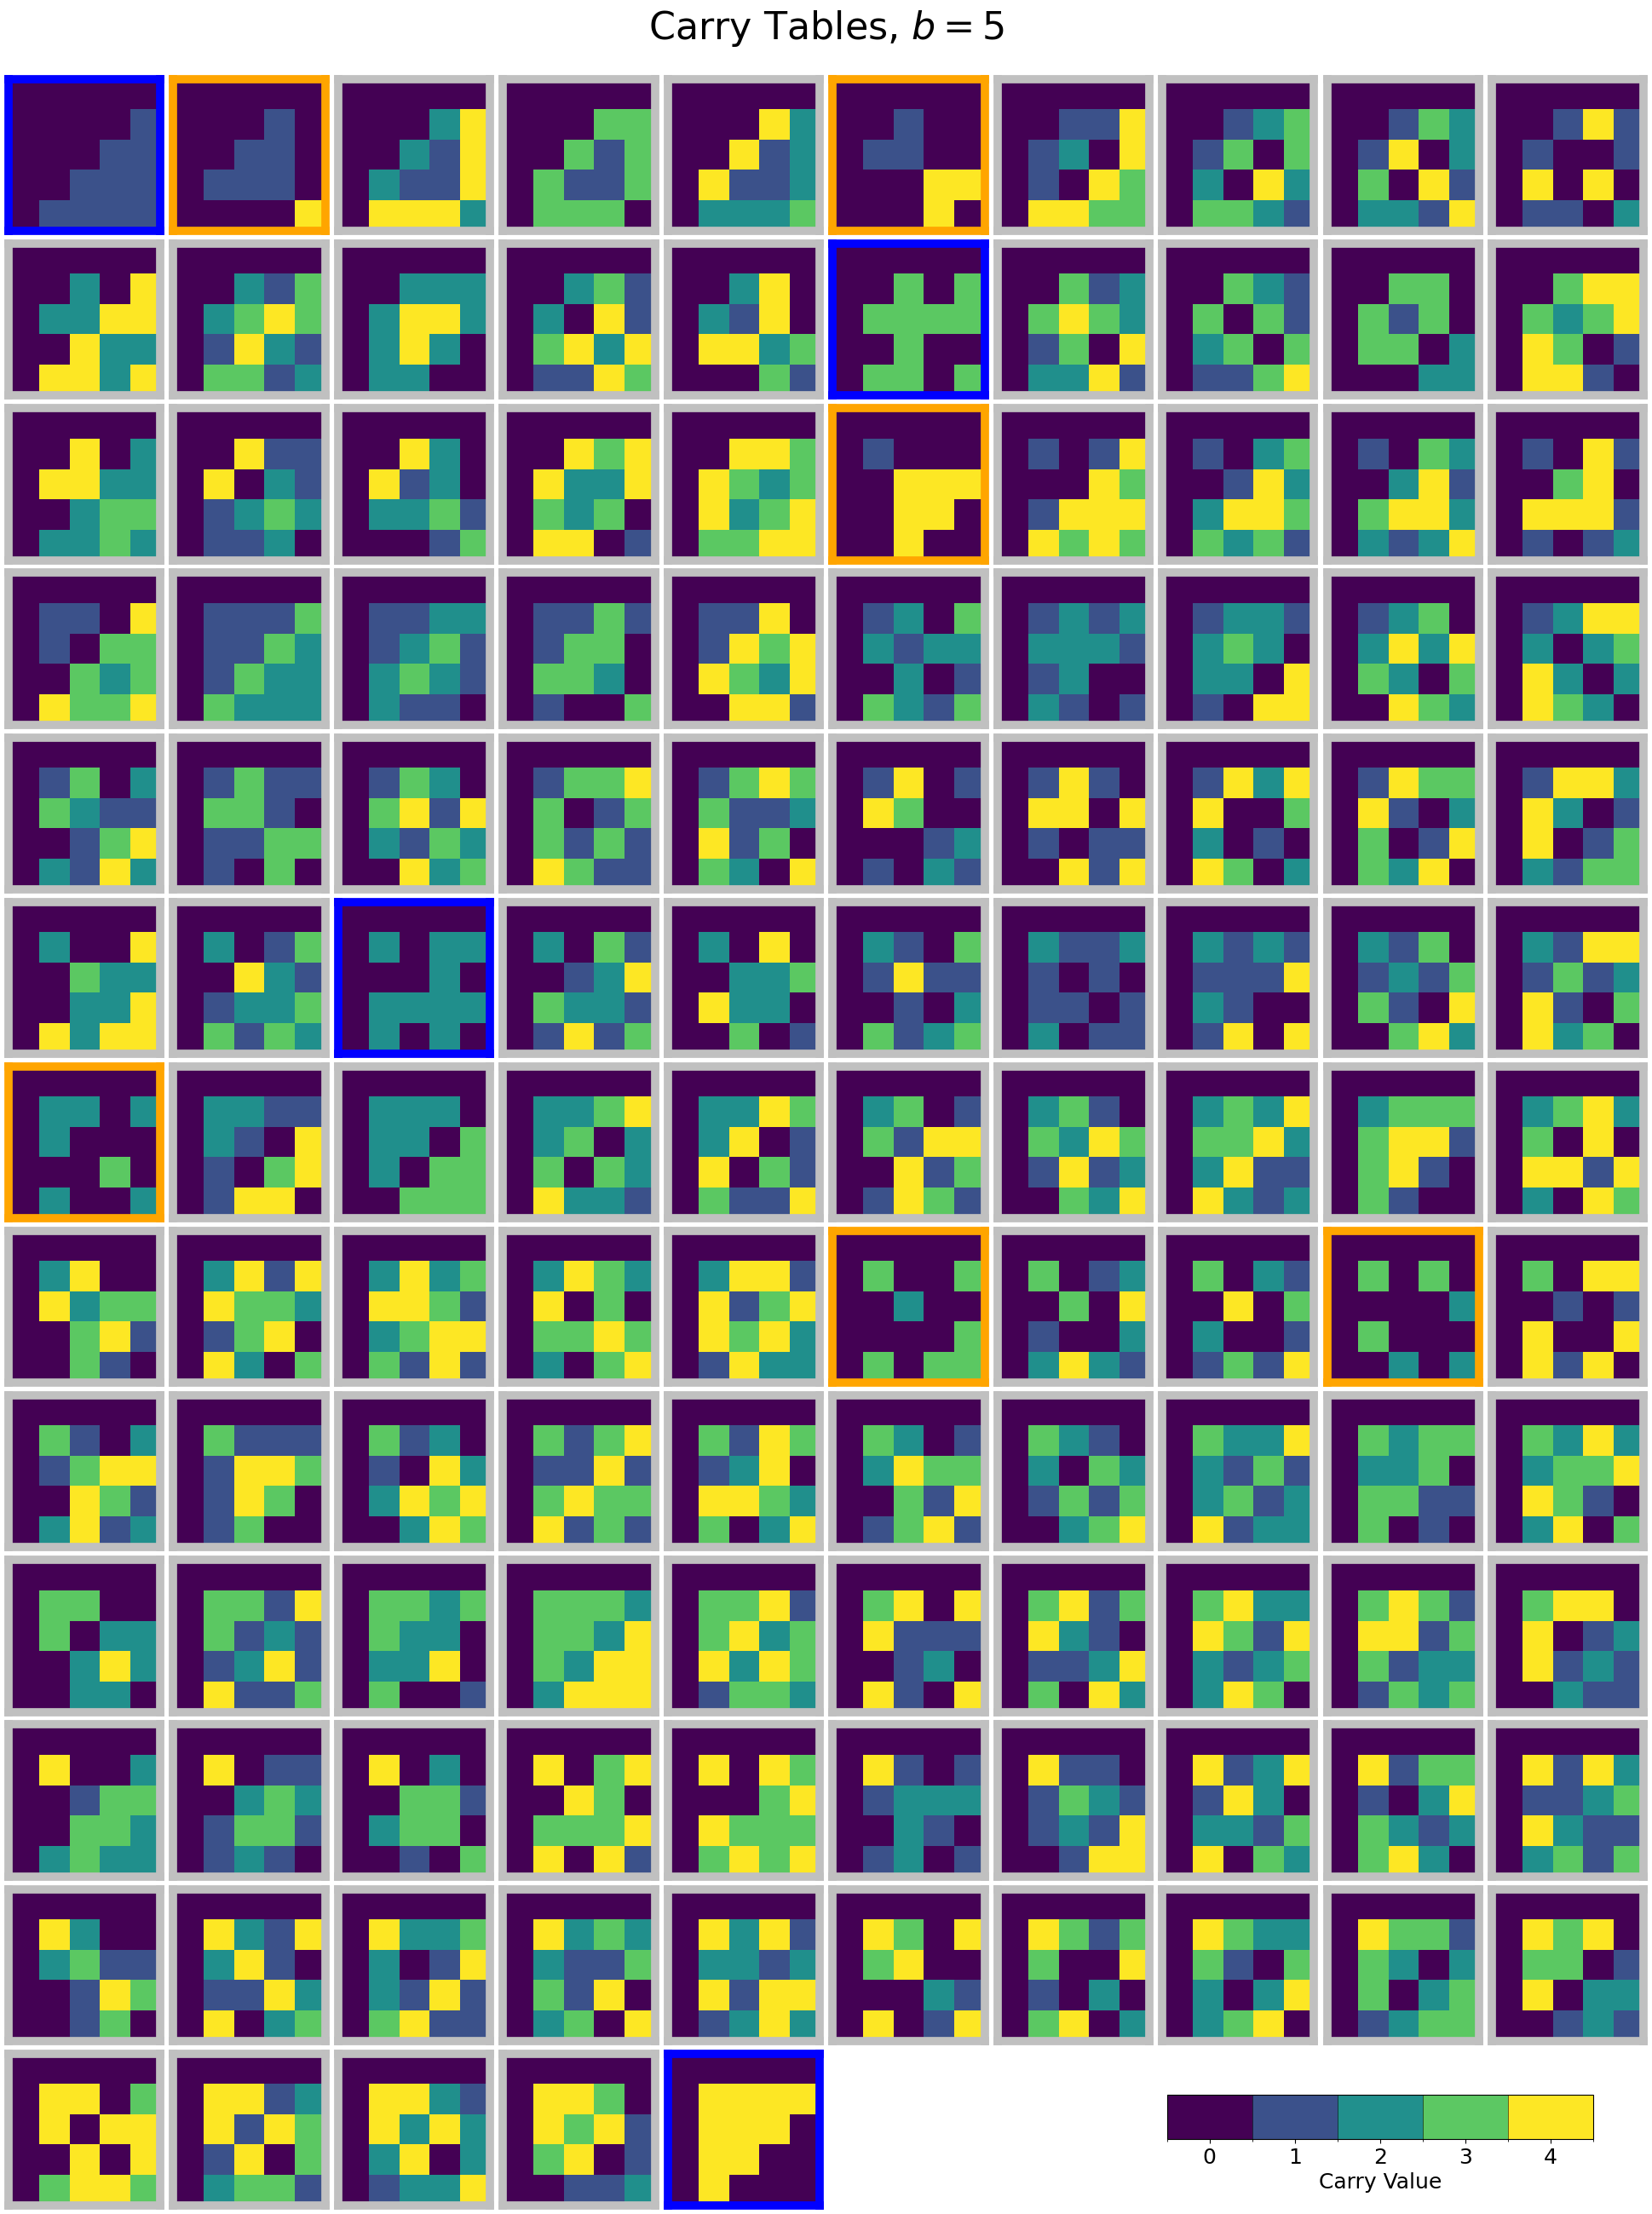

In [22]:
fig, axes = plt.subplots(13, 10, figsize=(2*10, 2*13))
fig.suptitle('Carry Tables, $b = 5$', fontsize=32, y=0.992)
axes = axes.flatten()

# sort table_dict
all_tables[b] = {dc: all_tables[b][dc] for dc in sorted(all_tables[b].keys())}

# iterate through table_dict
i = 0
for dc, table in all_tables[b].items():

    # classify as standard, alt. unit, or other carry
    est_dim = est_dim_box_vs_depth[b][dc][3]
    if len(np.unique(all_tables[b][dc])) == 2:
        color = 'blue'
    elif est_dim > 1.25 and est_dim < 1.5:
        color = 'orange'
    else:
        color = 'silver'

    # display image, increment i
    ax = axes[i]
    utils.add_border(ax, color=color, width=7)
    levels = np.linspace(-0.5, b-0.5, b+1)
    norm = BoundaryNorm(levels, ncolors=256)
    im = ax.imshow(table, cmap='viridis', norm=norm)
    i += 1

# turn off axis ticks and labels
for j, ax in enumerate(axes):
    ax.tick_params(axis='both', which='both', length=0)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    if j >= i:
        ax.axis('off')


# add colorbar
plt.tight_layout()
fig.subplots_adjust(bottom=0, top=0.96, left=0.02, right=0.98)
cbar_ax = fig.add_axes([0.7, 0.03, 0.25, 0.02])
cbar = fig.colorbar(im, cax=cbar_ax, boundaries=levels, drawedges=True, orientation='horizontal')
cbar.set_ticks(range(b))
cbar.ax.tick_params(labelsize=18)
cbar.set_label('Carry Value', fontsize=18)

# plt.savefig(f'../figures/tables5_d1.png', dpi=300)